<a href="https://colab.research.google.com/github/sovikapoudel/Data-Visualiation-Spring-2022/blob/main/Exam1_Sovika_CMPSC_4314.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Name: Sovika Poudel
###Course: CMPSA 4313
###Student Number: 268598
###Recources: 
1. GitHub repo from this course
2. nurfnick’s GitHub repo from this course
3. sovikapoudel's GitHub repo
3. Queries from stackoverflow
4. ECU Blackboard: Lecture slides

- Rest are referenced below at the bottom.

In [107]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [108]:
###For the BigQuery we need to authenticate to use google account as identity. We need this later for BigQuery public dataset.
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


##1. Gather the table on 8000 km mountains from the wikipedia page https://en.wikipedia.org/wiki/List of mountains by elevation





In [109]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_mountains_by_elevation')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")
#html_soup

###A. Store the data as a pandas dataframe: 
Storing data into table using a panda library.

In [110]:
tables = html_soup.find_all('table',class_="wikitable")
dataframe = pd.read_html(str(tables))[0]
dataframe

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8848,29029,Himalayas,Nepal/China
1,K2,8611,28251,Karakoram,Pakistan/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...


###B. Return only mountains in the ‘Himalayas’

In [111]:
himalayan= dataframe.groupby('Range') #this is not necessary so I am not returning any outof this line of code but I think grouping the data before extracting is good practice.
himalayan.get_group('Himalayas') ##this will return the list of mountains only in himalayas


,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8848,29029,Himalayas,Nepal/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...
13,Shishapangma,8027,26335,Himalayas,China


###C. Create a barchart of the ranges

Range
Himalayas    AxesSubplot(0.125,0.125;0.775x0.755)
Karakoram    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

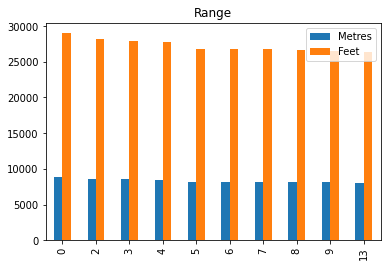

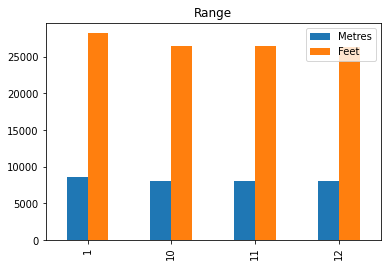

In [209]:

dataframe.plot(kind='bar', title= 'Range')

The next part is just a extra work I am doing for creating the bar chart of required field manually just for the himalayan part

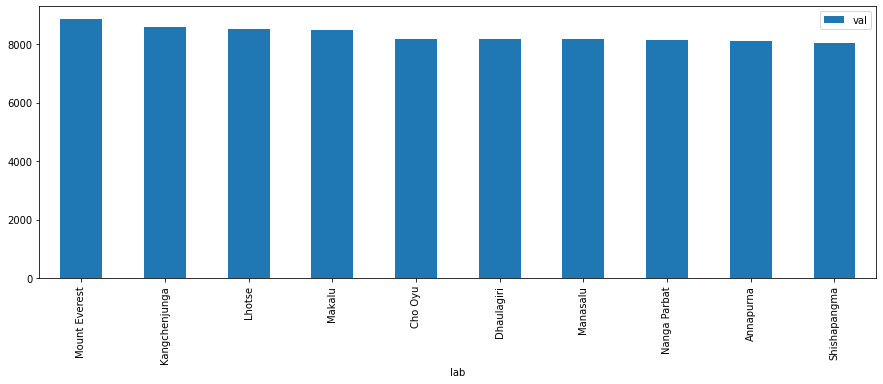

In [113]:
df = pd.DataFrame({'lab':['Mount Everest', 'Kangchenjunga', 'Lhotse','Makalu','Cho Oyu','Dhaulagiri','Manasalu','Nanga Parbat','Annapurna','Shishapangma'], 'val': [8848, 8586, 8516, 8485, 8188, 8167, 8163, 8126,8091, 8027]})
bar_chart = df.plot.bar(x='lab', y='val', figsize =(15,5))
##himalayan.plot(kind='bar', title= 'Range') ## this will give the bar chart of only himalayan categories.

###D. Create a box-plot of the height in Feet:



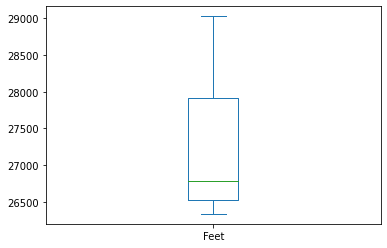

In [114]:
dataframe.Feet.plot(kind = 'box')

###E. Report the mean, standard deviation and five number summary of the height in Feet

In [116]:
dataframe.Feet.mean()

27178.0

In [118]:
dataframe.Feet.std()

879.4895372622952

In [128]:
dataframe.Feet.describe()[:5]


count       14.000000
mean     27178.000000
std        879.489537
min      26335.000000
25%      26518.000000
Name: Feet, dtype: float64

 ### F. Report the mean and median of mountains when grouped by their Range.

Mean

In [140]:
(dataframe.groupby(['Mountain', 'Range'], as_index=False).mean()
            .groupby('Range')['Feet'].mean())


Range
Himalayas    27295.6
Karakoram    26884.0
Name: Feet, dtype: float64

Median

In [144]:
(dataframe.groupby(['Mountain', 'Range'], as_index=False).median()
            .groupby('Range')['Feet'].median())

Range
Himalayas    26829.5
Karakoram    26461.5
Name: Feet, dtype: float64

##2. BigQuery

Use BigQuery public dataset ‘chicago taxi trips.taxi trips’ using the Colab and SQL interface.

In [147]:
%%bigquery --project data-vis-assignment-338801
SELECT *
  From `bigquery-public-data.chicago_taxi_trips.taxi_trips` #I added data set to my existing project that I have been using for my assignments. Other way could have been by creating a new project.
  LIMIT 5

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,3190243aa353d190bf2e5f366cd61617fa96f6a8,9d4a0cf00e9283302f40800a5da6e7017db07876ff895d...,2015-08-26 11:15:00+00:00,2015-08-26 11:15:00+00:00,0,0.0,None,None,None,None,5.85,1.46,0.0,0.0,7.31,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
1,6d5b6e5f3e5397f08e770beeb5f34433b0491d12,c2ca667849d5b9c2d10a15bf7e6a6ab358ab7a98cce37b...,2014-08-01 21:45:00+00:00,2014-08-01 21:45:00+00:00,0,0.0,None,None,None,None,8.45,0.00,0.0,0.0,8.45,Credit Card,T.A.S. - Payment Only,None,None,None,None,None,None
2,980c986313ec13a9d59412826c83bfa65e01d0c3,60e9b32a85d0045d670d329891f51b9796543659769e9a...,2014-08-01 18:45:00+00:00,2014-08-01 18:45:00+00:00,0,0.0,None,None,None,None,6.05,2.00,0.0,0.0,8.05,Credit Card,T.A.S. - Payment Only,None,None,None,None,None,None
3,29aea409062ff5c29c33fecff902acd8e58e5e0f,73f6888d8d8f9808f6624377edfa1e2a0a574b06eafbc9...,2014-07-31 09:45:00+00:00,2014-07-31 09:45:00+00:00,0,0.0,None,None,None,None,10.05,2.01,0.0,0.0,12.06,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,None,None,None,None,None,None
4,e83f8835694883f25c11fc70bdf8443b5c68448f,55af2e70fd4624a43fea70121974c54db44c8e7582ce3d...,2014-07-16 08:45:00+00:00,2014-07-16 08:45:00+00:00,0,0.0,None,None,None,None,3.25,0.00,0.0,1.0,4.25,Cash,Blue Ribbon Taxi Association Inc.,None,None,None,None,None,None


A. How many rows are in the dataset?

In [148]:
%%bigquery --project data-vis-assignment-338801
SELECT COUNT(*) as Num_Of_Rows #this will select all the rows and column from the dataset and the count function will return the total number of rows on that dataset.
  From `bigquery-public-data.chicago_taxi_trips.taxi_trips`

,Num_Of_Rows
0,198792903


###B. What is the average trip total based on payment type?

In [179]:
%%bigquery --project data-vis-assignment-338801
SELECT payment_type as Payment, AVG(trip_total) as Total_Trip_By_Payment
 From `bigquery-public-data.chicago_taxi_trips.taxi_trips`
 GROUP BY Payment

,Payment,Total_Trip_By_Payment
0,Credit Card,20.524892
1,Prcard,20.320682
2,Cash,12.265548
3,Way2ride,16.639366
4,Split,18.788039
5,Unknown,17.649893
6,Mobile,20.339910
7,Prepaid,22.377662
8,Dispute,15.496588
9,Pcard,10.116931


You can see the output which states the payment type of the average trip which seems pretty small figure but I guess it's correct. I even checked how many payments were made by credit card and there are so many missing data which are stored as none and so many 0 payment by credit card which is why the average seems small.

###c. How many trips, that had a non-zero recorded time, were above the average time?

In [202]:
%%bigquery --project data-vis-assignment-338801
SELECT AVG(trip_seconds) as Trip, 
From `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE trip_seconds !=0

,Trip
0,837.160891


In [206]:
%%bigquery --project data-vis-assignment-338801
SELECT Count(trip_seconds) as Trip_Sec, 
From `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE trip_seconds >  (SELECT AVG(trip_seconds), 
From `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE trip_seconds !=0) # I nested the previous query(where I got average) to get this output.

,Trip_Sec
0,60750508


##3. About the Exam

###A. Approximately how long did you work on this exam?
- It took me 5 hours in total. If I had focused on only finishing the exam I could have completed it in 2 hours or less but I am a very curious person so I needed to know every query and it's uses so at the time of solving these answer I ended up researching and testing so many methods and queries so eventually ended up spending more time.

###B. Which was the hardest and easiest topic from this section?
- For me, I did not find any hardest part but if I have to say it would be calculating mean and median grouped by their ranges. But I was able to find it in stack overflow website which I have referenced below.And I found the bar chart part confusing as I was comfused if I needed to create the bar chart for whole mountains or only the one sorted by range in previous step. So, just to be on the safe side I did both of them.

- And the easiest part was the BigQuery SQL, I found it easier may be because I am very interested in SQL and we did alot of coursework on it. 

###C. Which method of gathering data are you most excited to use again?
- My plan for my career is either database administrator or Ethical hacking or Cybersecurity, ehiter one needs alot of database and python so I am still for learning/analysing datas, BigQuery and SQL, and pandas dataframe.

References:

1. Reading Data from web assignment: https://colab.research.google.com/drive/1lhA9BBKEodpdUutms6gB4bY8O_jfJZWS#scrollTo=AisoHEs8XV1u
2. For grouping data: https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/
3. For BarChart, Boxplot, Mean, Median, five number summary: https://github.com/nurfnick/Data_Viz/blob/main/01_Python.ipynb
4. Mean and median while grouped by Range
https://stackoverflow.com/questions/30328646/python-pandas-group-by-in-group-by-and-average
5. BigQuery, Part-2: https://github.com/sovikapoudel/Data-Visualiation-Spring-2022/blob/main/Data_Vis_BigQuery.ipynb